# Exercise 1
### Computer Vision, Fall 2025
#### Name: <font color='blue'>Matias Paloranta</font>
---
**Instructions:**
- Return the answer in PDF and Jupyter Notebook formats.

- Return latest on<font color='red'> Sunday 14.9 at 23.50</font> via Moodle.


## Ex 1.1 Homogeneous Coordinates and Transformations (2 Points)

#### a) Translate $(t)$, scale $(s)$, and rotate $(r)$ a point $c=(c_x, c_y)$ on the xy-plane to a new location $(d_x, d_y)$ as illustrated below.

![title](images/img01.png)
 
Using the translation $(2, 3)$, scaling $(-2, 8)$, and rotation $(70^{\circ})$, answer the following:

(i) Provide the matrix representation for the translation using homogeneous coordinates.

(ii) Provide the matrix representation for the scaling using homogeneous coordinates.

(iii) Provide the matrix representation for the rotation using homogeneous coordinates.

(iv) Transform the point $c=(3,4)$ on the xy-plane to a new location $(d_x, d_y)$ using the translation and scaling operations given in sections (i) and (ii). Perform two separate tasks: first translation then scaling, and first scaling then translation. Compare the final locations and state if the order of transformations matters. You only need to provide the final locations.

Hint:

 - We have provided empty matrices for you. Fill them with the correct values.

#### 1.1.a i) Translation

    Answer:
$$
Translation:
\begin{bmatrix}
   1 & 0 & 2 \\
   0 & 1 & 3 \\
   0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
   c_x \\
   c_y \\
   1 \\
\end{bmatrix}
=
\begin{bmatrix}
   c_x + 2 \\
   c_y + 3 \\
   1 \\
\end{bmatrix}
$$

#### 1.1.a ii) Scaling

    Answer:
    
$$
Scale:
\begin{bmatrix}
   -2 & 0 & 0 \\
   0 & 8 & 0 \\
   0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
   c_x \\
   c_y \\
   1 \\
\end{bmatrix}
=
\begin{bmatrix}
   -2 c_x \\
   8 c_y \\
   1 \\
\end{bmatrix}
$$

#### 1.1.a iii) Rotation

    Answer:

$$
Rotation:
\begin{bmatrix}
   \cos 70^\circ & -\sin 70^\circ & 0 \\
   \sin 70^\circ & \cos 70^\circ & 0 \\
   0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
   c_x \\
   c_y \\
   1 \\
\end{bmatrix}
=
\begin{bmatrix}
   \cos 70^\circ c_x - \sin 70^\circ c_y \\
   \sin 70^\circ c_x + \cos 70^\circ c_y \\
   1 \\
\end{bmatrix}
$$

#### 1.1.a iv) Comparing the Outcomes: Translation Followed by Scaling vs. Scaling Followed by Translation

    Answer: 
    
Set $c=(3,4)$. 

First translation then scaling:
$$
\implies c^\prime
=
\begin{bmatrix}
    -4 \\
    35 \\
    1 \\
\end{bmatrix}
$$

First scaling then translation:
$$
\implies c^\prime
=
\begin{bmatrix}
    -10 \\
    56 \\
    1 \\
\end{bmatrix}
$$

Since the outcomes are not the same, the order of transformations matter.

In [6]:
import numpy as np

t = np.matrix("1 0 2; 0 1 3; 0 0 1")
s = np.matrix("-2 0 0; 0 8 0; 0 0 1")
c = np.matrix("3; 4; 1")
print((t @ s ) @ c)
print((s @ t) @ c)

[[-4]
 [35]
 [ 1]]
[[-10]
 [ 56]
 [  1]]


#### b) Homogeneous line

i) Give the formula for presenting a homogeneous coordinate as a line. Plot the homogeneous lines $l_1$ and $l_2$ in a 2D coordinate system where $l_1 = (1,0,1)$ and $l_2 = (6,0,2)$. Describe what the lines look like.

ii) Calculate the point where the homogeneous lines $l_1$ and $l_2$ join. Are you able to plot this point in a 2D plot? Explain why if not.

Hint:

 - the (3x1) homogenous point vector x must satisfy both $I_1^Tx = 0$ and $I_2^Tx = 0$. In other words, it should be orthogonal to both $I_1$ and $I_2$.

    Answer:
    
i)

A homogenous line is a 3-vector $\boldsymbol{l}=(a, b, c)$ defining the set of points $\boldsymbol{x}=(x,y,1)$ satisfying the equation $$\boldsymbol{x} \cdot \boldsymbol{l} = ax + by + c = 0.$$ 

In 2D-space, for $\boldsymbol{l}_1=(1,0,1)$ we obtain $$x + 1 = 0 \implies x = -1$$ and for $\boldsymbol{l}_2=(6,0,2)$ we obtain $$6x + 2 = 0 \implies x=-\frac{1}{3}.$$

So we have two vertical lines at $x=-1$ and $x=-\frac{1}{3}$. 

ii)

The intersection $\boldsymbol{x}$ is given by the cross product $\boldsymbol{x} = \boldsymbol{l}_1 \times \boldsymbol{l}_2$. For $\boldsymbol{l}_1 = (1,0,1)$ and $\boldsymbol{l}_2 = (6,0,2)$ we obtain

$$
\boldsymbol{x} = \boldsymbol{l}_1 \times \boldsymbol{l}_2 = (0,4,0).
$$

Since the last element of $\boldsymbol{x}$ is $0$, it represents a point at infinity and thus cannot be plotted in a 2D plot.



## Ex 1.2 OpenCV basics and image manipulation with Python (3 points)

In this exercise we’ll start learning how to use Python and OpenCV for computer vision tasks.

In [75]:
# Import Python packages needed in this week exercises. 
from matplotlib import pyplot as plt
import numpy as np
import cv2

#### 1.2 a)

- Load the image located at 'images/lapland.jpeg'.
- State the shape (dimensions) of the image.
- Display the original image and each of its three color channels (Blue, Green, and Red) separately.

Hint: 

- By default, OpenCV's `imread` function reads images in BGR format, while Matplotlib displays images in RGB format. 
    - You can use OpenCV's `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` to convert the image from BGR to RGB.
- Images containing a single color channel are typically displayed using a grayscale colormap.
    - In matplotlib, you can use the parameter `cmap='gray'` to achieve this.

Image shape: (1356, 2000, 3)


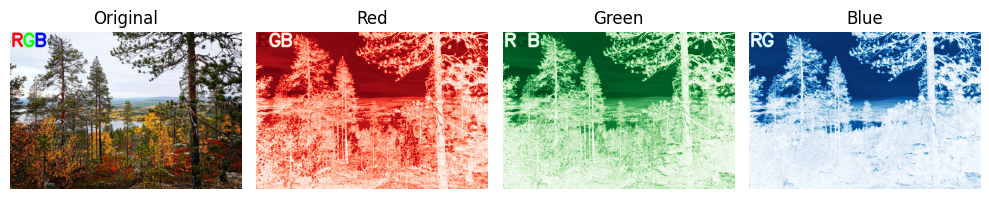

In [157]:
img = cv2.imread("images/lapland.jpeg", cv2.IMREAD_COLOR_RGB)
print(f"Image shape: {img.shape}")

r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

fig, ax = plt.subplots(1, 4, figsize=(10,10))

titles = "Original Red Green Blue".split()
cmaps = "gray Reds Greens Blues".split()
imgs = [img, r, g, b]

for i, img, c, title in zip(range(4), imgs, cmaps, titles):
    ax[i].imshow(img, cmap=c)
    ax[i].set_title(title)
    ax[i].axis("off")
plt.tight_layout()

#### 1.2 b)

- Load the grayscale image 'images/white_cross.png'.
- Identify the point (x, y) where the white lines intersect. Assume the origin (0,0) is at the top-left corner.

The image below illustrates the coordinate system employed in this exercise, which is also frequently utilized in computer vision.

<img src="images/image_coordinates.png" width="350" align="center">

Hints:

- The image contains only two color values: 0 and 255, indicating it's a 1-channel black and white image.
- The intersecting lines are straight, parallel to the axis, and have a thickness of one pixel.

The intersection point is at (370, 190)


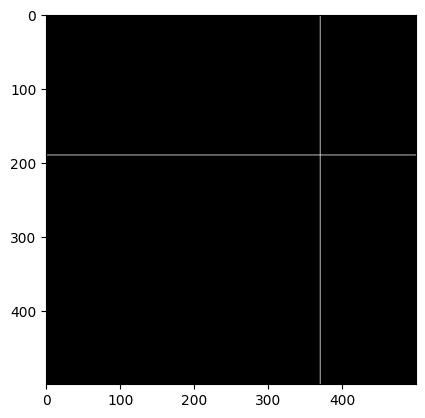

In [137]:
img = cv2.imread("images/white_cross.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
rows, cols = np.nonzero(img) # indices of non-zero entries

# there will be a single repeating element in the row indices from which
# we can determine the the y-coordinate and similarly we can use column
# indices to determine the x-coordinate
uniques_y, counts = np.unique(rows, return_counts=True)
y_coord = uniques_y[counts > 1].item()
uniques_x, counts = np.unique(cols, return_counts=True)
x_coord = uniques_x[counts > 1].item()

print(f"The intersection point is at ({x_coord}, {y_coord})")

#### 1.2 c)

- Load the color image 'images/red_and_blue.jpg'.
- Determine the size of the red circle and blue rectangle in terms of pixel count.

Hint:

- The image only includes RGB color values: (0,0,0), (0,0,255), and (255,0,0).

Size of red circle: 709 pixels
Size of blue rectangle: 726 pixels


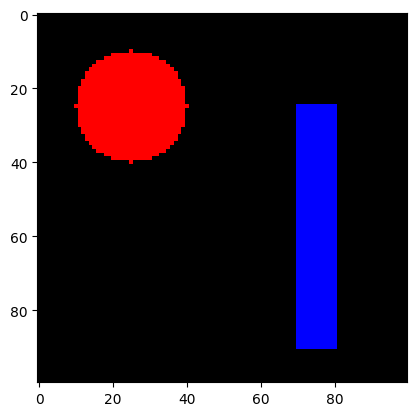

In [139]:
img = cv2.imread("images/red_and_blue.png", cv2.IMREAD_COLOR_RGB)
plt.imshow(img)
# The sizes of the shapes in terms of pixels can be determined by
# counting the non-zero entries in their respective color channels
red_count = np.count_nonzero(img[:, :, 0])
blue_count = np.count_nonzero(img[:, :, 2])
print(f"Size of red circle: {red_count} pixels")
print(f"Size of blue rectangle: {blue_count} pixels")


## Ex 1.3 Singular Value Decomposition (SVD) (3 points)

Singular Value Decomposition (SVD): Every $m \times p$ matrix factors into $A_{n \times p} = U_{n \times n} \Sigma_{n \times p} V^T_{p \times p}$

Singular Value Decomposition can be used for image compression by first applying SVD to the image matrix and then recomposing it by using only some of the singular values contained in matrix $\Sigma_{n \times p}$ and dropping the respective columns and rows in matrices $U_{n \times n}$ and $V^T_{p \times p}$ in order to make the matrices compatible for recomposing the image matrix.

Try this for yourself by decomposing images/lenna.png (open the image as grayscale) with SVD, and then recompose the image by using only the first 50 singular values (you can use the ready-made SVD function in numpy.linalg library, no need to implement it from scratch unless you want to). Also try using different number of singular values. How many singular values are needed before the image no longer appears blurry (Optional extra: how is the image size changed, i.e how much memory you save by compressing the image)?

Explain why this method of image compression works, what is the role of singular values and what information they contain? Brief explanation is enough for this assignment.

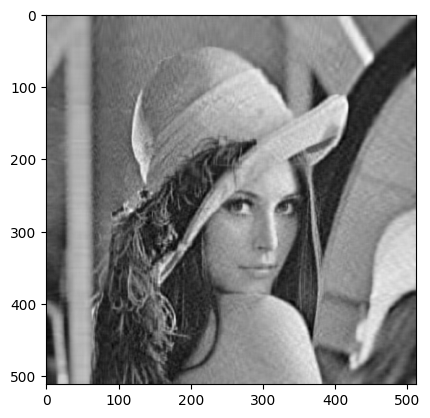

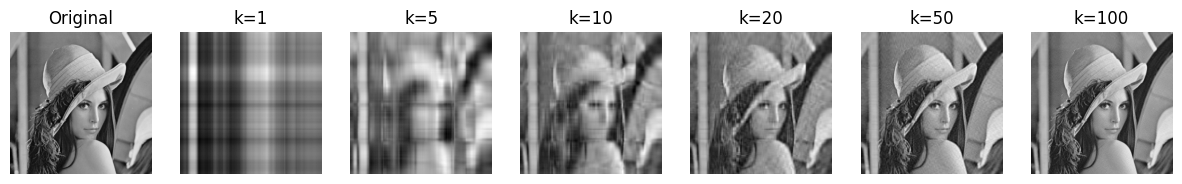

In [169]:
img = cv2.imread("images/lenna.png", cv2.IMREAD_GRAYSCALE)
#print(img.nbytes)
plt.imshow(img, cmap="gray")

def reconstruct_image(img, k):
    """Reconstruct grayscale image using k highest singular values."""
    U, S, V = np.linalg.svd(img)
    reconstructed = (U[:, :k] * S[:k]) @ V[:k, :]
    return reconstructed

#print(U.shape, S.shape, V.shape)
k = 50
#reconstructed = U[:, :k] @ np.diag(S[:k]) @ V[:k, :]
reconstructed = reconstruct_image(img, k)
#print(reconstructed.nbytes)
plt.imshow(reconstructed, cmap="gray")

ks = [1, 5, 10, 20, 50, 100]
reconstructed = [reconstruct_image(img, k) for k in ks]
imgs = [img] + reconstructed
titles = ["Original"] + [f"k={k}" for k in ks]
fig, ax = plt.subplots(1, len(imgs), figsize=(15,20))
for i, img, title in zip(range(len(imgs)), imgs, titles):
    ax[i].imshow(img, cmap="gray")
    ax[i].set_title(title)
    ax[i].axis("off")


Image shape: (512, 512)


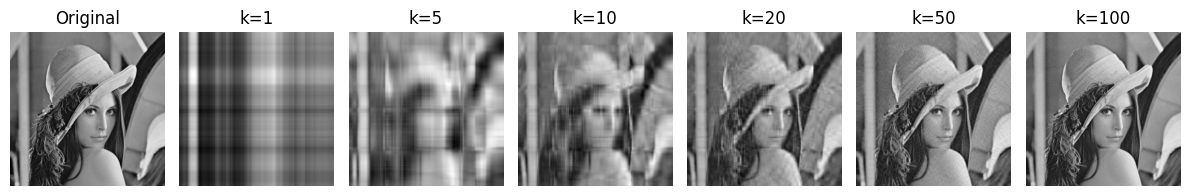

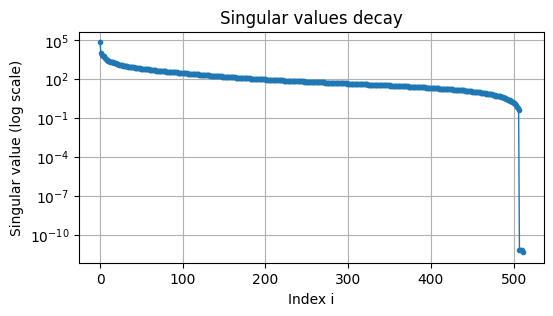

k=  5  energy captured=0.9681
k= 10  energy captured=0.9838
k= 20  energy captured=0.9918
k= 50  energy captured=0.9974
k=100  energy captured=0.9993
k= 10  approx compression ratio: 25.58x
k= 50  approx compression ratio: 5.12x
k=100  approx compression ratio: 2.56x


In [150]:
img = cv2.imread('images/lenna.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("images/lenna.png not found. Check path.")

M, N = img.shape
print("Image shape:", img.shape)

# 2) Compute full SVD (economy size)
U, S, Vt = np.linalg.svd(img.astype(float), full_matrices=False)
# S is a 1D array of singular values length = min(M,N)

# 3) Function to reconstruct with k singular values
def reconstruct_k(k):
    # U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
    return (U[:, :k] * S[:k]) @ Vt[:k, :]

# 4) Show originals and reconstructions
ks = [1, 5, 10, 20, 50, 100]  # adjust depending on image size
ks = [k for k in ks if k <= min(M, N)]
n = len(ks) + 1
plt.figure(figsize=(12, 3))
plt.subplot(1, n, 1)
plt.imshow(img, cmap='gray'), plt.title('Original')
plt.axis('off')

for i, k in enumerate(ks, start=2):
    rec = reconstruct_k(k)
    rec_clipped = np.clip(rec, 0, 255).astype(np.uint8)
    plt.subplot(1, n, i)
    plt.imshow(rec_clipped, cmap='gray')
    plt.title(f'k={k}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# 5) Plot singular values (log scale helpful)
plt.figure(figsize=(6,3))
plt.plot(S, marker='.', linewidth=1)
plt.yscale('log')
plt.xlabel('Index i')
plt.ylabel('Singular value (log scale)')
plt.title('Singular values decay')
plt.grid(True)
plt.show()

# 6) Optional: compute energy captured and compression ratio
energy_total = np.sum(S**2)
for k in [5, 10, 20, 50, 100]:
    if k > len(S): break
    energy_k = np.sum(S[:k]**2)
    print(f"k={k:3d}  energy captured={energy_k/energy_total:.4f}")

# 7) Compression storage (approx): original M*N values vs U_k, S_k, Vt_k
def compression_ratio(k):
    orig = M * N
    # storing real numbers: U(M*k) + S(k) + Vt(k*N)
    stored = M*k + k + k*N
    return orig / stored

for k in [10, 50, 100]:
    if k > min(M,N): break
    print(f"k={k:3d}  approx compression ratio: {compression_ratio(k):.2f}x")